In [2]:
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,RocCurveDisplay
import matplotlib.pyplot as plt

#Loading pre-split data
data = joblib.load ("../Results/split_data.joblib")
X_train = data["X_train"]
X_test = data["X_test"]
y_train = data["y_train"]
y_test = data["y_test"]

print("Training and testing data loaded successfully.")

Training and testing data loaded successfully.


In [3]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

print("Data successfully scaled.")


Data successfully scaled.


In [6]:
# Initialize the SVM Classifier
# The 'rbf' kernel is a powerful non-linear kernel
# probability=True is needed to calculate the ROC AUC score
svm_model = SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')

# Train the model on the SCALED training data
print("Training the SVM model...")
svm_model.fit(X_train_scaled, y_train)
print("Model training complete.")


Training the SVM model...
Model training complete.


--- Classification Report (SVM Model) ---
              precision    recall  f1-score   support

           0       0.55      0.48      0.51        50
           1       0.35      0.41      0.38        34

    accuracy                           0.45        84
   macro avg       0.45      0.45      0.44        84
weighted avg       0.47      0.45      0.46        84


--- Confusion Matrix (SVM Model) ---
                Predicted: 0 | Predicted: 1
Actual: 0      24            | 26           
Actual: 1      20            | 14           

XGBoost ROC AUC Score: 0.5700
SVM ROC AUC Score: 0.5324

Plotting ROC Curve...


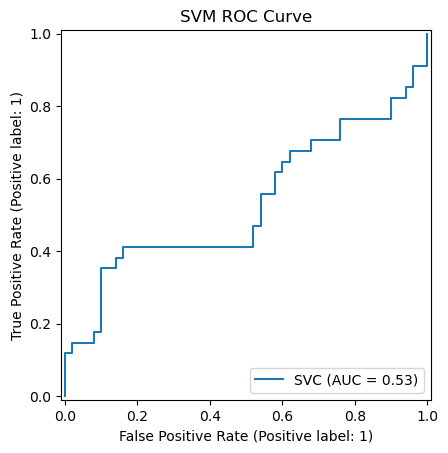

In [7]:
# Make predictions on the SCALED test set
y_pred = svm_model.predict(X_test_scaled)
y_pred_proba = svm_model.predict_proba(X_test_scaled)[:, 1]

# --- Evaluation ---
print("--- Classification Report (SVM Model) ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix (SVM Model) ---")
cm = confusion_matrix(y_test, y_pred)
print("                Predicted: 0 | Predicted: 1")
print(f"Actual: 0      {cm[0,0]:<13} | {cm[0,1]:<13}")
print(f"Actual: 1      {cm[1,0]:<13} | {cm[1,1]:<13}")

roc_auc_svm = roc_auc_score(y_test, y_pred_proba)
print(f"\nXGBoost ROC AUC Score: 0.5700")
print(f"SVM ROC AUC Score: {roc_auc_svm:.4f}")

# Plot the ROC Curve
print("\nPlotting ROC Curve...")
RocCurveDisplay.from_estimator(svm_model, X_test_scaled, y_test)
plt.title('SVM ROC Curve')
plt.show()
